https://www.rdkit.org/docs/GettingStartedInPython.html

In [2]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


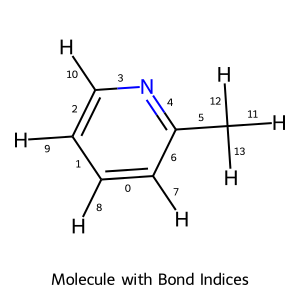

In [3]:
m = Chem.MolFromSmiles('c1cccnc1C')
m = Chem.AddHs(m)

for atom in m.GetAtoms():
    atom.SetProp("atomNote", "")  # Use "atomNote" to display atom indices

# # Draw the molecule with atom indices
# img = Draw.MolToImage(m, legend="Molecule with Atom Indices")
# img.show()

for bond in m.GetBonds():
    bond.SetProp("bondNote", str(bond.GetIdx()))  # Use "bondNote" to display bond indices

# Draw the molecule with bond indices
img = Draw.MolToImage(m, legend="Molecule with Bond Indices")
img.show()

In [4]:
radius = 2
# m = Chem.MolFromSmiles('c1cccnc1C')



fpgen = AllChem.GetMorganGenerator(radius=radius)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetSparseCountFingerprint(m,additionalOutput=ao)

morganFP = AllChem.GetMorganFingerprintAsBitVect(m,radius=radius,nBits=100000)
print("num bits on:", morganFP.GetNumOnBits())

(fp.GetNonzeroElements())



num bits on: 20


[17:56:57] DEPRECATION WARNING: please use MorganGenerator


{55253355: 4,
 62162552: 1,
 442148024: 1,
 447750523: 1,
 1028523287: 1,
 1064828642: 1,
 1100037548: 1,
 1130134577: 1,
 1759772490: 1,
 2041434490: 1,
 2063064224: 1,
 2246728737: 1,
 2392445291: 2,
 2615172355: 1,
 2730584333: 1,
 3217380708: 1,
 3218693969: 4,
 3321501787: 3,
 4036277955: 1,
 4277593716: 7}

In [5]:
bi = ao.GetBitInfoMap()
bi

{55253355: ((7, 1), (8, 1), (9, 1), (10, 1)),
 62162552: ((1, 2),),
 442148024: ((3, 2),),
 447750523: ((6, 1),),
 1028523287: ((6, 2),),
 1064828642: ((0, 2),),
 1100037548: ((4, 1),),
 1130134577: ((0, 1),),
 1759772490: ((5, 2),),
 2041434490: ((4, 0),),
 2063064224: ((3, 1),),
 2246728737: ((6, 0),),
 2392445291: ((1, 1), (2, 1)),
 2615172355: ((4, 2),),
 2730584333: ((2, 2),),
 3217380708: ((5, 0),),
 3218693969: ((0, 0), (1, 0), (2, 0), (3, 0)),
 3321501787: ((11, 1), (12, 1), (13, 1)),
 4036277955: ((5, 1),),
 4277593716: ((7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0))}

In [6]:

for r in range(0, radius+1):
    print("radius", r)
    for bit in bi:
        
        if bi[bit][0][1] == r:
            mfp2_svg = Draw.DrawMorganBit(m, bit, bi, useSVG=True)
            # print(bi[bit])
            # display(mfp2_svg)

radius 0
radius 1
radius 2


In [7]:
"""deprecated because we want circular subgraphs
"""
def get_sub_graphs(smiles):
    RADIUS_UPPER_LIMIT = 2
    m = Chem.MolFromSmiles(smiles)
    m = Chem.AddHs(m) # not needed because we look at SMILES, not like generate_FPs
    all_subgraphs_smiles = set()
    for radius in range(RADIUS_UPPER_LIMIT+1):
        print(f"radius: {radius}")
        subgraphs = Chem.FindUniqueSubgraphsOfLengthN(m, radius)
        for subgraph in subgraphs:
            # Get the subgraph as a new molecule
            submol = Chem.PathToSubmol(m, subgraph)
            smiles = Chem.MolToSmiles(submol, canonical=True)
            all_subgraphs_smiles.add(smiles)
            # print(smiles)
            # img = Draw.MolToImage(submol, size=(100, 90))
            # img.show()
    # print(len(all_subgraphs_smiles))
    return all_subgraphs_smiles
get_sub_graphs("c1cccnc1C")

radius: 0
radius: 1
radius: 2


{'Ccn', 'cC', 'cc', 'ccC', 'ccc', 'ccn', 'cn', 'cnc'}

In [8]:

def get_circular_substructures(smiles, radius=2):
    # Example molecule
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)

    # Compute Morgan fingerprint with radius 
    info = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=radius, bitInfo=info)
    print(f"Number of bits set: {len(fp.GetNonzeroElements())}")
    # Extract circular subgraphs
    circular_substructures = set()
    # display(info)
    for bit_id, atom_envs in info.items():
        print(f"Bit ID: {bit_id}")
        for atom_idx, radius in atom_envs:
            # Get the circular environment as a subgraph
            env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx)
            submol = Chem.PathToSubmol(mol, env)
            smiles = Chem.MolToSmiles(submol)
            if smiles in circular_substructures:
                print(f"Already found: {smiles}")
            circular_substructures.add(smiles)
            
            print(smiles)
            break
    display(circular_substructures)
    print(f"Number of circular substructures: {len(circular_substructures)}")

smile = 'c1cccnc1C'
get_circular_substructures(smile)

Number of bits set: 20
Bit ID: 55253355
[H]c
Bit ID: 62162552
ccccc
Bit ID: 442148024
cccnc
Bit ID: 447750523
cC
Bit ID: 1028523287
cc(C)n
Bit ID: 1064828642
cccc(C)n
Bit ID: 1100037548
cnc
Bit ID: 1130134577
ccc
Bit ID: 1759772490
ccc(C)nc
Bit ID: 2041434490

Bit ID: 2063064224
ccn
Bit ID: 2246728737
Already found: 

Bit ID: 2392445291
Already found: ccc
ccc
Bit ID: 2615172355
ccnc(c)C
Bit ID: 2730584333
ccccn
Bit ID: 3217380708
Already found: 

Bit ID: 3218693969
Already found: 

Bit ID: 3321501787
[H]C
Bit ID: 4036277955
Already found: cc(C)n
cc(C)n
Bit ID: 4277593716
Already found: 



[17:56:58] DEPRECATION WARNING: please use MorganGenerator


{'',
 '[H]C',
 '[H]c',
 'cC',
 'cc(C)n',
 'ccc',
 'ccc(C)nc',
 'cccc(C)n',
 'ccccc',
 'ccccn',
 'cccnc',
 'ccn',
 'ccnc(c)C',
 'cnc'}

Number of circular substructures: 14


((0, 1),)


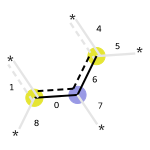

In [9]:
# from above code, bi is ao.GetBitInfoMap()
bit = 1130134577
mfp2_svg = Draw.DrawMorganBit(m, bit, bi, useSVG=True)
print(bi[bit])
display(mfp2_svg)

((0, 0), (1, 0), (2, 0), (3, 0))


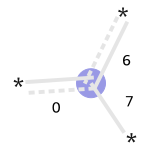

In [10]:
bit =  3218693969
mfp2_svg = Draw.DrawMorganBit(m, bit, bi, useSVG=True)
print(bi[bit])
display(mfp2_svg)

My plan: find all sub-structures of my training set. when you run my model on the website, i can show you similar sub-structures.
questions to chemists:
1. radius 0 has empty smiles. Can i assume you don't need radius 0 infomation?
2. there are two Cc(c)n and two ccc. Are they identical? Because the two Cc(c)n correspond to different bits in morganfingerprint but they have same smiles (so same bit position in my version of fingerprint). I want to confirm it is fine to consider them as the same

Number of bits set: 27
radius: 0
2041434490: 


[17:58:08] DEPRECATION WARNING: please use MorganGenerator


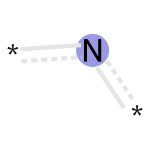

2246728737: 


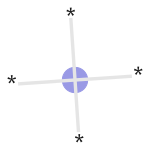

3217380708: 


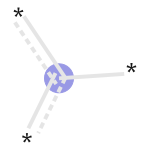

3218693969: 


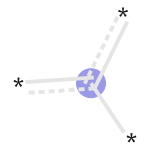

4277593716: 


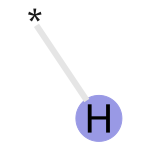

radius: 1
55253355: [H]c


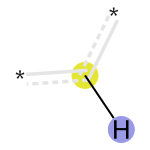

447750523: cC


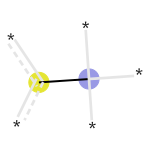

1100037548: cnc


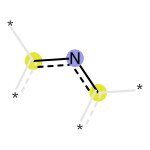

1130134577: ccc


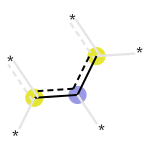

2063064224: ccn


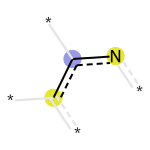

2392445291: ccc


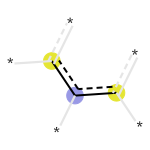

3321501787: [H]C


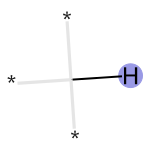

4036277955: cc(C)n


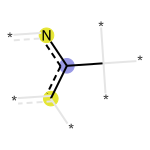

radius: 2
62162552: ccccc


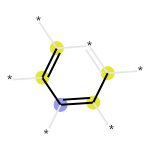

442148024: cccnc


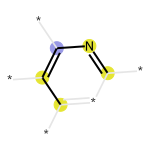

1028523287: cc(C)n


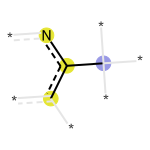

1064828642: cccc(C)n


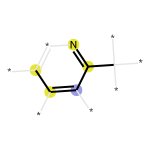

1759772490: ccc(C)nc


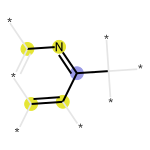

2615172355: ccnc(c)C


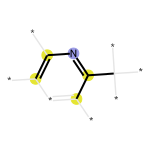

2730584333: ccccn


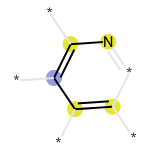

radius: 3
944565055: Cc1ccccn1


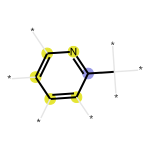

1796971582: c1ccncc1


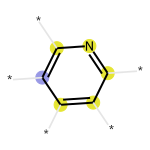

2453185450: Cc1ccccn1


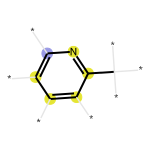

3264987196: Cc1ccccn1


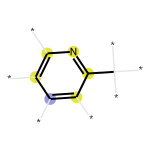

3754881039: Cc1ccccn1


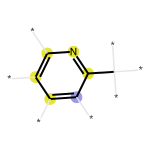

4270390799: Cc1ccccn1


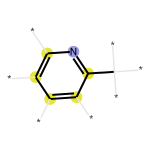

radius: 4
912467351: Cc1ccccn1


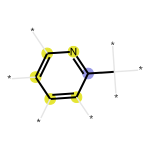

radius: 5
radius: 6
radius: 7
radius: 8


{55253355,
 62162552,
 442148024,
 447750523,
 912467351,
 944565055,
 1028523287,
 1064828642,
 1100037548,
 1130134577,
 1759772490,
 1796971582,
 2041434490,
 2063064224,
 2246728737,
 2392445291,
 2453185450,
 2615172355,
 2730584333,
 3217380708,
 3218693969,
 3264987196,
 3321501787,
 3754881039,
 4036277955,
 4270390799,
 4277593716}

In [12]:
def show_fp_bits(smiles, radius, show_imag =True):
    # Example molecule
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    all_bits = set()
    # Compute Morgan fingerprint with radius 
    info = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=radius, bitInfo=info)
    print(f"Number of bits set: {len(fp.GetNonzeroElements())}")
    # Extract circular subgraphs
    # display(info)
    for r in range(0, radius+1):
        print(f"radius: {r}")
        for bit_id, atom_envs in info.items():
            all_bits.add(bit_id)
            for atom_idx, curr_r in atom_envs:
                if curr_r != r:
                    continue
                # Get the circular environment as a subgraph
                env = Chem.FindAtomEnvironmentOfRadiusN(mol, curr_r, atom_idx)
                submol = Chem.PathToSubmol(mol, env)
                smiles = Chem.MolToSmiles(submol)
                
            
                print(f"{bit_id}: {smiles}")
                if show_imag:
                    mfp2_svg = Draw.DrawMorganBit(mol, bit_id, info, useSVG=True)
                    display(mfp2_svg)
                break
            
    return all_bits

smile = 'c1cccnc1C'
show_fp_bits("c1cccnc1C", 2)

Number of bits set: 122
radius: 0
864662311: 


[18:04:18] DEPRECATION WARNING: please use MorganGenerator


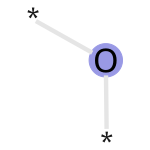

864674487: 


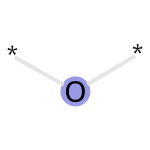

2245384272: 


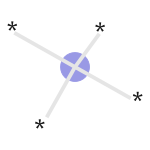

2976033787: 


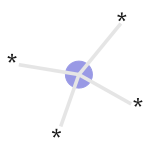

3189457552: 


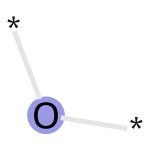

4277593716: 


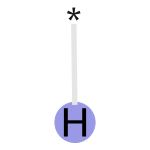

radius: 1
828524593: [H]C


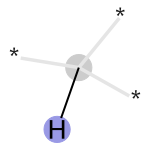

920763749: COC


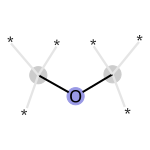

980906191: CO


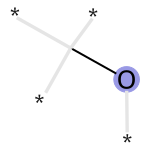

1499870378: CC(O)O


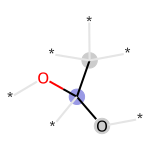

1735962896: CC(C)O


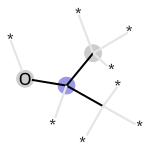

1740830013: CO


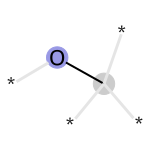

2341235807: CC(C)O


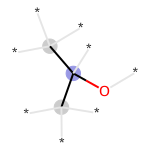

2667063169: COC


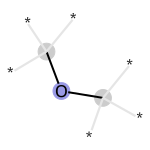

2928264258: CC(C)O


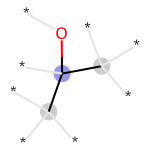

3072032085: [H]O


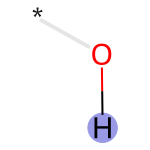

3147550929: CCO


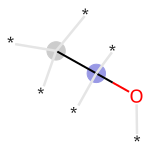

3309593724: [H]C


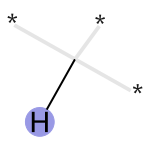

3871699279: CC(O)O


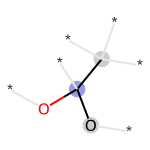

radius: 2
142467889: CCO


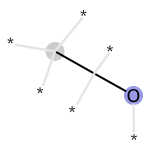

442065971: CC(C)OC(C)O


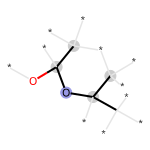

462124800: CC(O)C(O)C(O)O


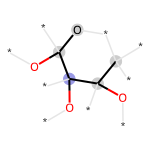

909541062: CC(O)O


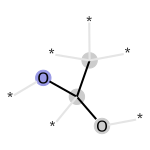

935711045: CC(O)C(O)C(C)O


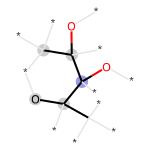

951667725: CC(C)OC(C)O


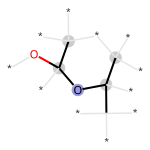

1987336728: COC(OC)C(C)O


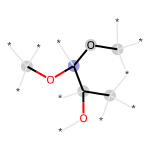

2080774098: CC(O)CO


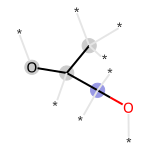

2425510740: CC(O)C(O)C(C)O


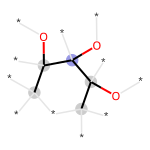

2675651241: COC(CO)C(C)O


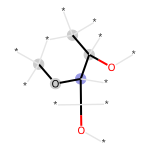

3114427839: COC(C(C)O)C(C)O


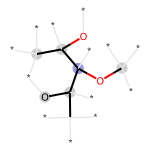

3595290954: CC(C)OC(C)O


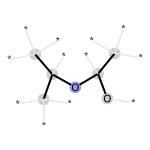

3738479493: CC(O)C(O)C(O)O


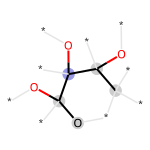

3821588491: CC(O)C(O)C(C)O


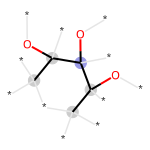

3959747184: COC(CO)C(C)O


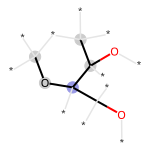

4120809274: COC(O)C(C)O


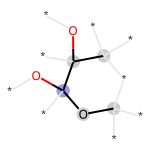

4156912708: CC(C)O


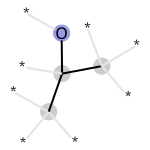

radius: 3
318175659: COC(CO)C(C)O


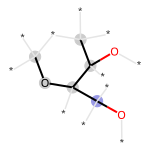

452820703: CC(C)OC1OC(C)CC(O)C1O


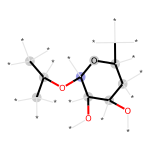

974159630: CC1OC(O)C(O)C(O)C1O


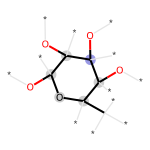

1024726835: COC(OC(C(C)O)C(C)O)C(C)O


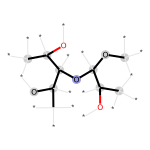

1181530214: COC(CO)C(C)O


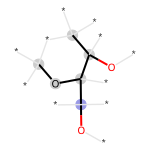

1264220325: OC1COC(O)C(O)C1O


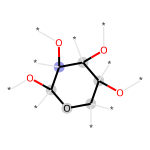

1484569126: OCC1OCC(O)C(O)C1O


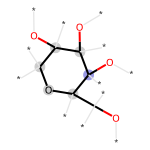

1490442428: COC1C(C)OC(O)C(O)C1O


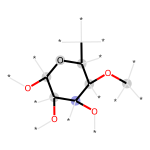

1535466368: OCC1OC(O)C(O)CC1O


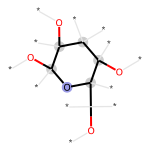

1876475044: COC1OC(CO)C(O)CC1O


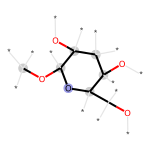

1968802638: CC(O)OC1C(CO)OCC(O)C1O


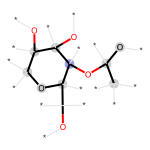

1973380701: COC1C(O)CC(O)OC1CO


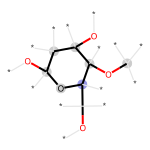

1975244008: COC1OCC(O)C(O)C1O


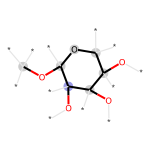

2071951410: COC1C(C)OC(O)C(O)C1O


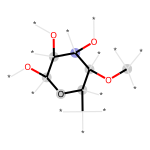

2550175543: OCC1OC(O)CC(O)C1O


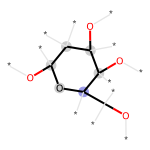

2739338471: COC1OC(CO)C(O)CC1O


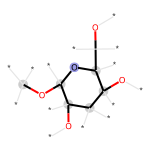

2894496374: COC1OCC(O)C(O)C1O


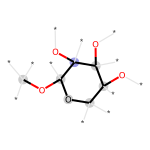

3392497264: COC1C(O)CC(O)OC1CO


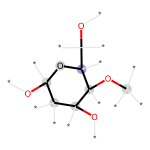

3889919611: CC1CC(O)C(O)C(O)O1


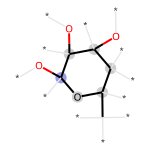

radius: 4
430530624: COC(OC1C(CO)OC(O)C(O)C1O)C(C)O


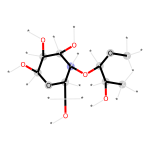

772247315: COC1C(C)OC(O)C(O)C1O


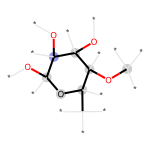

897722759: CC(C)OC1OC(CO)C(O)C(O)C1O


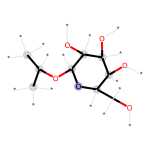

947843641: COC1C(C)OC(OC(C)C)C(O)C1O


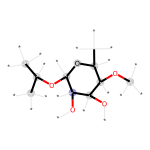

1021603868: CC(O)C(OC1OC(CO)C(O)C(O)C1O)C(C)O


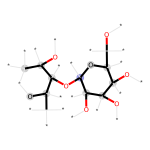

1031258886: CC(O)OC1C(CO)OC(O)C(O)C1O


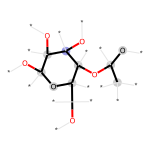

1208057580: COC1OC(CO)C(OC(C)O)C(O)C1O


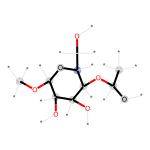

1283437269: COC1OC(CO)C(O)C(O)C1O


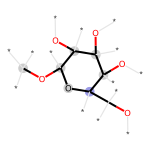

1337778299: COC1C(CO)OC(O)C(O)C1O


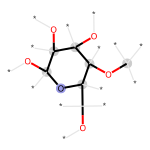

1416718044: CC(C)OC1OC(C)C(O)C(O)C1O


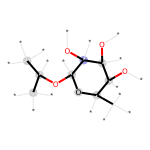

1552813581: CC(O)OC1C(CO)OC(O)C(O)C1O


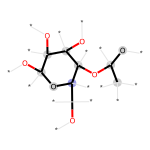

1659323568: OCC1OC(O)C(O)C(O)C1O


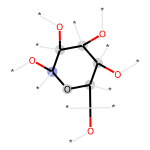

1739982266: COC(OC1C(CO)OC(O)C(O)C1O)C(C)O


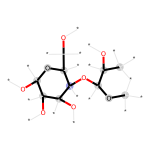

2140857726: CC(O)C(OC1OC(CO)C(O)C(O)C1O)C(C)O


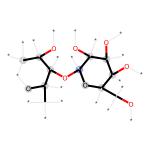

2162129679: COC1C(CO)OC(OC(C)C)C(O)C1O


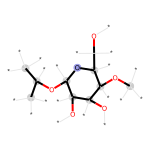

2715341473: OCC1OC(O)C(O)C(O)C1O


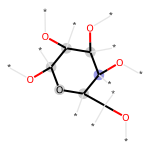

3126180900: CC1CC(O)C(O)C(OC2C(CO)OCC(O)C2O)O1


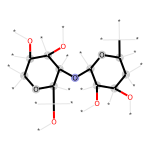

3433776826: COC1OC(CO)C(O)C(O)C1O


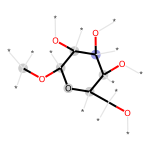

4219641344: COC1OC(CO)C(OC(C)O)C(O)C1O


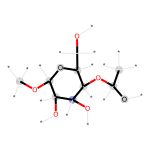

radius: 5
152124664: COC(OC1C(CO)OC(O)C(O)C1O)C(C)O


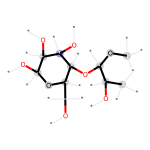

284500146: OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(O)C(O)C1O


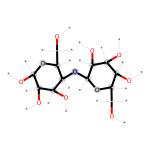

630051293: CC(C)OC1OC(CO)C(O)C(O)C1O


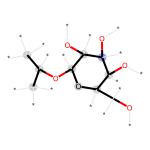

714722065: COC1OC(CO)C(O)C(O)C1O


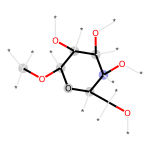

779239937: OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(O)C(O)C1O


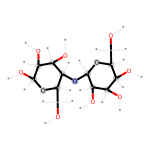

845935930: COC1OC(CO)C(OC2OC(C)CC(O)C2O)C(O)C1O


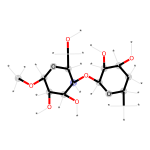

1140091708: CC(O)OC1C(CO)OC(O)C(O)C1O


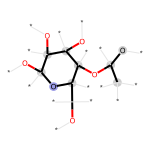

1689966198: CC(O)C(OC1OC(CO)C(O)C(O)C1O)C(C)O


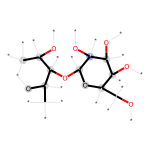

1764929798: COC(OC1C(CO)OC(OC(C)C)C(O)C1O)C(C)O


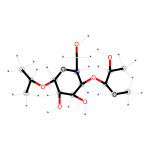

2106035908: CC(O)OC1C(CO)OC(OC(C(C)O)C(C)O)C(O)C1O


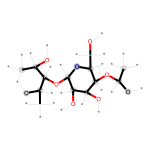

2851326575: CC1CC(O)C(O)C(OC2C(CO)OC(O)C(O)C2O)O1


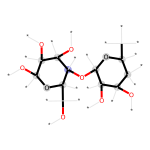

3423169945: COC1C(CO)OC(O)C(O)C1O


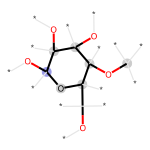

3433869944: COC1C(CO)OC(OC2C(CO)OCC(O)C2O)C(O)C1O


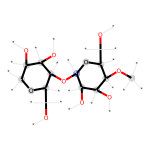

3506903080: CC(O)C(OC1OC(CO)C(O)C(O)C1O)C(C)O


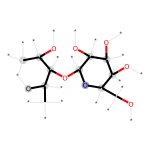

3736277388: OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(O)C(O)C1O


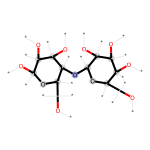

3798119660: OCC1OC(OC2C(CO)OCC(O)C2O)C(O)C(O)C1O


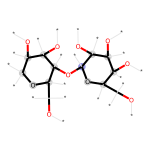

4215014751: CC(O)OC1C(CO)OC(OC(C(C)O)C(C)O)C(O)C1O


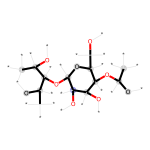

radius: 6
157124266: COC(OC1C(CO)OC(OC2C(CO)OCC(O)C2O)C(O)C1O)C(C)O


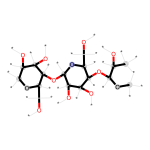

447903782: CC(C)OC1OC(CO)C(OC2OC(CO)C(O)C(O)C2O)C(O)C1O


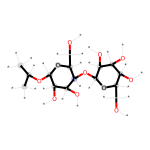

466587140: CC(O)OC1C(CO)OC(OC2C(CO)OC(O)C(O)C2O)C(O)C1O


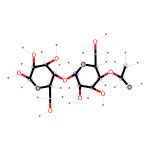

644595846: CC(C)OC1OC(CO)C(OC2OC(CO)C(O)C(O)C2O)C(O)C1O


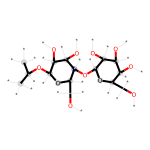

756218412: OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(O)C(O)C1O


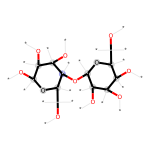

1260993804: CC(O)OC1C(CO)OC(OC2C(CO)OC(O)C(O)C2O)C(O)C1O


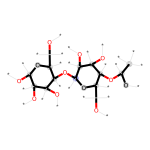

3024826482: OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(O)C(O)C1O


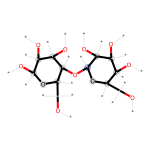

3888661768: COC1OC(CO)C(OC2OC(CO)C(O)C(O)C2O)C(O)C1O


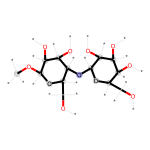

3948638606: COC1C(CO)OC(OC2C(CO)OC(O)C(O)C2O)C(O)C1O


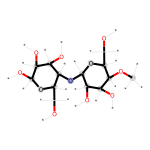

4071162708: COC1OC(CO)C(OC2OC(CO)C(OC)C(O)C2O)C(O)C1O


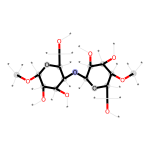

4188088295: CC1CC(O)C(O)C(OC2C(CO)OC(OC(C(C)O)C(C)O)C(O)C2O)O1


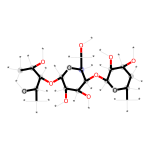

radius: 7
969967613: CC(O)OC1C(CO)OC(OC2C(CO)OC(O)C(O)C2O)C(O)C1O


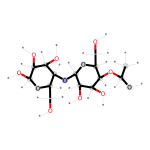

1004909826: CC(C)OC1OC(CO)C(OC2OC(CO)C(OC(C)O)C(O)C2O)C(O)C1O


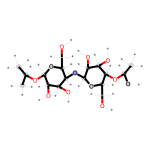

1083014058: COC1C(CO)OC(OC2C(CO)OC(OC(C(C)O)C(C)O)C(O)C2O)C(O)C1O


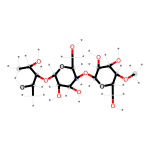

1247298212: CC(O)C(OC1OC(CO)C(OC2OC(CO)C(O)C(O)C2O)C(O)C1O)C(C)O


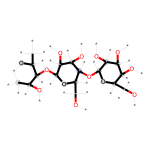

1335396032: CC(C)OC1OC(CO)C(OC2OC(CO)C(O)C(O)C2O)C(O)C1O


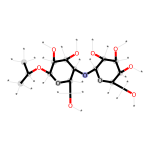

2781587977: OCC1OC(OC2C(CO)OC(OC3C(CO)OCC(O)C3O)C(O)C2O)C(O)C(O)C1O


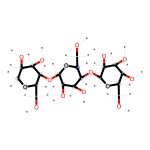

3118715689: OCC1OC(OC2C(CO)OC(OC3C(CO)OCC(O)C3O)C(O)C2O)C(O)C(O)C1O


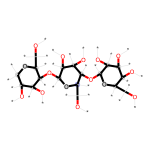

3920381762: COC(OC1C(CO)OC(OC2C(CO)OC(O)C(O)C2O)C(O)C1O)C(C)O


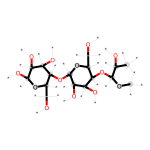

3976576795: CC1CC(O)C(O)C(OC2C(CO)OC(OC3C(CO)OC(O)C(O)C3O)C(O)C2O)O1


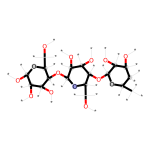

4095456981: COC(OC1C(CO)OC(OC2C(CO)OC(OC)C(O)C2O)C(O)C1O)C(C)O


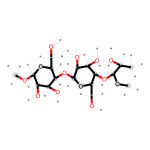

4097568341: CC1CC(O)C(O)C(OC2C(CO)OC(OC3C(CO)OC(O)C(O)C3O)C(O)C2O)O1


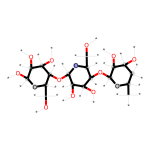

radius: 8
365613060: COC(OC1C(CO)OC(OC2C(CO)OC(OC(C(C)O)C(C)O)C(O)C2O)C(O)C1O)C(C)O


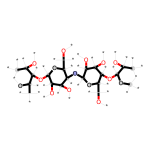

412993375: CC(C)OC1OC(CO)C(OC2OC(CO)C(OC3OC(C)CC(O)C3O)C(O)C2O)C(O)C1O


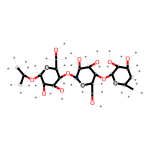

623329411: OCC1OC(OC2C(CO)OC(OC3C(CO)OC(O)C(O)C3O)C(O)C2O)C(O)C(O)C1O


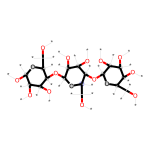

865431390: CC(O)OC1C(CO)OC(OC2C(CO)OC(OC3C(CO)OCC(O)C3O)C(O)C2O)C(O)C1O


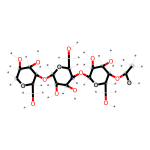

1806378162: COC1C(CO)OC(OC2C(CO)OC(OC3C(CO)OC(O)C(O)C3O)C(O)C2O)C(O)C1O


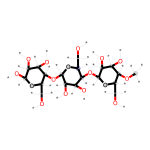

3513065039: OCC1OC(OC2C(CO)OC(OC3C(CO)OCC(O)C3O)C(O)C2O)C(O)C(O)C1O


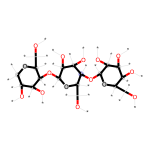

3713476193: COC1OC(CO)C(OC2OC(CO)C(OC3OC(CO)C(O)C(O)C3O)C(O)C2O)C(O)C1O


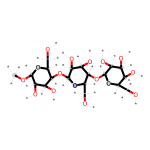

3776164342: OCC1OC(OC2C(CO)OC(OC3C(CO)OC(O)C(O)C3O)C(O)C2O)C(O)C(O)C1O


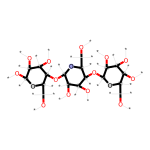

4256024434: CC1CC(O)C(O)C(OC2C(CO)OC(OC3C(CO)OC(O)C(O)C3O)C(O)C2O)O1


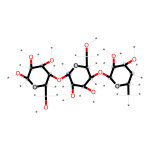

{142467889,
 152124664,
 157124266,
 284500146,
 318175659,
 365613060,
 412993375,
 430530624,
 442065971,
 447903782,
 452820703,
 462124800,
 466587140,
 623329411,
 630051293,
 644595846,
 714722065,
 756218412,
 772247315,
 779239937,
 828524593,
 845935930,
 864662311,
 864674487,
 865431390,
 897722759,
 909541062,
 920763749,
 935711045,
 947843641,
 951667725,
 969967613,
 974159630,
 980906191,
 1004909826,
 1021603868,
 1024726835,
 1031258886,
 1083014058,
 1140091708,
 1181530214,
 1208057580,
 1247298212,
 1260993804,
 1264220325,
 1283437269,
 1335396032,
 1337778299,
 1416718044,
 1484569126,
 1490442428,
 1499870378,
 1535466368,
 1552813581,
 1659323568,
 1689966198,
 1735962896,
 1739982266,
 1740830013,
 1764929798,
 1806378162,
 1876475044,
 1968802638,
 1973380701,
 1975244008,
 1987336728,
 2071951410,
 2080774098,
 2106035908,
 2140857726,
 2162129679,
 2245384272,
 2341235807,
 2425510740,
 2550175543,
 2667063169,
 2675651241,
 2715341473,
 2739338471,
 278158

In [13]:
show_fp_bits("OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O", 8)

In [47]:
show_fp_bits('c1ccccc1C(=O)O', 2, show_imag=False)

Number of bits set: 20
radius: 0
864662311: 
864942730: 
2246699815: 
3217380708: 
3218693969: 
4277593716: 
radius: 1
55253355: [H]c
127271038: CO
1130134577: ccc
1510328189: C=O
2392445291: ccc
2784506312: cC(O)=O
2994748777: Cc(c)c
3072032085: [H]O
radius: 2
62162552: ccccc
364495723: cC(O)=O
1448962966: cc(c)C(O)=O
2938016831: ccc(cc)C(O)=O
3434436707: ccccc
3782239696: Cc(c)ccc


{55253355,
 62162552,
 127271038,
 364495723,
 864662311,
 864942730,
 1130134577,
 1448962966,
 1510328189,
 2246699815,
 2392445291,
 2784506312,
 2938016831,
 2994748777,
 3072032085,
 3217380708,
 3218693969,
 3434436707,
 3782239696,
 4277593716}

In [21]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
import numpy as np
x = np.array(AllChem.GetMorganFingerprintAsBitVect(m,15,nBits=6144))
x

array([0, 0, 0, ..., 0, 0, 0])

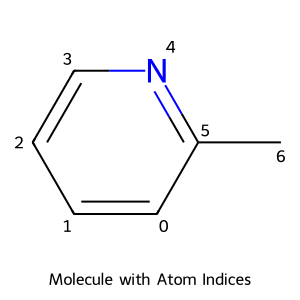

In [101]:
atoms

{0, 4, 5, 6}

In [49]:
bits1 = show_fp_bits("OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O",
             2,
             show_imag=False)   
bits2 = show_fp_bits('c1ccccc1C(=O)O', 2, show_imag=False)

Number of bits set: 36
radius: 0
864662311: 
864674487: 
2245384272: 
2976033787: 
3189457552: 
4277593716: 
radius: 1
828524593: [H]C
920763749: COC
980906191: CO
1499870378: CC(O)O
1735962896: CC(C)O
1740830013: CO
2341235807: CC(C)O
2667063169: COC
2928264258: CC(C)O
3072032085: [H]O
3147550929: CCO
3309593724: [H]C
3871699279: CC(O)O
radius: 2
142467889: CCO
442065971: CC(C)OC(C)O
462124800: CC(O)C(O)C(O)O
909541062: CC(O)O
935711045: CC(O)C(O)C(C)O
951667725: CC(C)OC(C)O
1987336728: COC(OC)C(C)O
2080774098: CC(O)CO
2425510740: CC(O)C(O)C(C)O
2675651241: COC(CO)C(C)O
3114427839: COC(C(C)O)C(C)O
3595290954: CC(C)OC(C)O
3738479493: CC(O)C(O)C(O)O
3821588491: CC(O)C(O)C(C)O
3959747184: COC(CO)C(C)O
4120809274: COC(O)C(C)O
4156912708: CC(C)O
Number of bits set: 20
radius: 0
864662311: 
864942730: 
2246699815: 
3217380708: 
3218693969: 
4277593716: 
radius: 1
55253355: [H]c
127271038: CO
1130134577: ccc
1510328189: C=O
2392445291: ccc
2784506312: cC(O)=O
2994748777: Cc(c)c
3072032085: [

In [51]:
print(len(bits1), len(bits2))
print(len(bits1.intersection(bits2)))
print(len(bits1.union(bits2)))

36 20
3
53


In [29]:
for x in env:
    print(x)
print(len(env))

2
3
1
4
0
5
6
7
